# Simple Risk Forecasting

This code demonstrates a simple risk forecasting simulation using Python. 

In [1]:
import numpy as np
import pandas as pd

from scipy import stats
from statistics import NormalDist

from sklearn.preprocessing import scale
import math
import random

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

***
### Define Parameters
***

Define the minimum and maximum values for the probability of an event, the number of simulation trials, and the parameters for log-normal distribution.



In [3]:
# Define the minimum and maximum values for probability of event
MIN = .07
MAX = .17
# Define the number of trials
NUM_SAMPLES = 1000
# Define the log loss mean and standard deviation
LOG_MEAN = 12.55
LOG_STD = 3.06

In [4]:
# Initialize lists to store trial results
trial_results = []

In [5]:
# Ensure we always get the same numbers
# random.seed(42)

***
### Generate Random Probabilities
***

In [6]:
# Generate random numbers for each trial
for trial in range(NUM_SAMPLES):
    # Generate a random number between MIN and MAX, not assuming any underlying distribution 
    random_number = MIN + (MAX-MIN) * random.random()
    trial_results.append(random_number)

In [7]:
# Create a DataFrame to store the trial results
data = {'Frequency': np.arange(1, NUM_SAMPLES + 1), 'Probability_of_event': trial_results}
df = pd.DataFrame(data)

In [8]:
# Display the results
df

,Frequency,Probability_of_event
0,1,0.128540
1,2,0.079846
2,3,0.120144
3,4,0.106058
4,5,0.074657
...,...,...
995,996,0.075342
996,997,0.076830
997,998,0.145549
998,999,0.119430


***
### Simulate Events
***

Let's simulate events based on the generated probabilities.

In [9]:
# Each of the probabilities may lead to a simulated event
# Simulate events based on adjusted probabilities
df['Simulated_event'] = df['Probability_of_event'].apply(lambda x: 1 if random.random() < x else 0)

In [10]:
# Display the results
df

,Frequency,Probability_of_event,Simulated_event
0,1,0.128540,0
1,2,0.079846,0
2,3,0.120144,0
3,4,0.106058,0
4,5,0.074657,0
...,...,...,...
995,996,0.075342,0
996,997,0.076830,1
997,998,0.145549,0
998,999,0.119430,0


***
### Simulate Losses
***

Let's simulate losses based on a log-normal distribution.

In [11]:
# Use np.random.lognormal instead of NormalDist
dist = np.random.lognormal(mean=LOG_MEAN, sigma=LOG_STD, size=NUM_SAMPLES)
df['Possible_loss'] = dist

In [12]:
# Display the results
df

,Frequency,Probability_of_event,Simulated_event,Possible_loss
0,1,0.128540,0,3.147545e+06
1,2,0.079846,0,1.259383e+04
2,3,0.120144,0,2.396118e+07
3,4,0.106058,0,1.200271e+05
4,5,0.074657,0,4.639285e+05
...,...,...,...,...
995,996,0.075342,0,4.556434e+03
996,997,0.076830,1,4.694585e+04
997,998,0.145549,0,3.949485e+04
998,999,0.119430,0,3.889183e+04


***
### Calculate Simulated Loss
***

Calculate simulated loss for each trial

In [13]:
df['Simulated_loss'] = df['Simulated_event'] * df['Possible_loss']

***
### Logarithm Transformation
***

In [14]:
# Filter non-positive values instead of fallback
df['Log_simulated_loss'] = df['Simulated_loss'].apply(lambda x: math.log10(x) if x > 0 else 0)

In [15]:
# Display the results
df

,Frequency,Probability_of_event,Simulated_event,Possible_loss,Simulated_loss,Log_simulated_loss
0,1,0.128540,0,3.147545e+06,0.000000,0.000000
1,2,0.079846,0,1.259383e+04,0.000000,0.000000
2,3,0.120144,0,2.396118e+07,0.000000,0.000000
3,4,0.106058,0,1.200271e+05,0.000000,0.000000
4,5,0.074657,0,4.639285e+05,0.000000,0.000000
...,...,...,...,...,...,...
995,996,0.075342,0,4.556434e+03,0.000000,0.000000
996,997,0.076830,1,4.694585e+04,46945.853419,4.671597
997,998,0.145549,0,3.949485e+04,0.000000,0.000000
998,999,0.119430,0,3.889183e+04,0.000000,0.000000


***
### Visualization
***

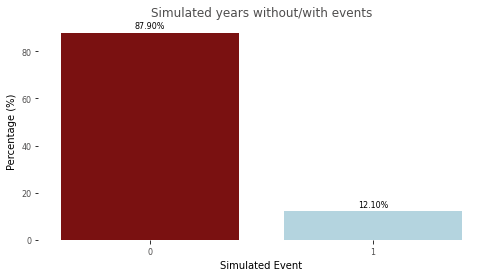

In [17]:
# Get counts and percentages
counts = df['Simulated_event'].value_counts()
percentages = counts / len(df) * 100

# Create a new DataFrame for the barplot
bar_data = pd.DataFrame({
    'Simulated_event': counts.index,
    'Percentage': percentages.values
})

# Plot the barplot
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(data=bar_data, x='Simulated_event', y='Percentage', palette=['darkred', 'lightblue'])
plt.xlabel('Simulated Event')
plt.ylabel('Percentage (%)')
plt.title('Simulated years without/with events', size=12, color='#4f4e4e')
plt.xticks(size=8, color='#4f4e4e')
plt.yticks(size=8, color='#4f4e4e')
sns.despine(left=True, bottom=True)

# Add text labels
for i, pct in enumerate(percentages):
    plt.text(x=i, y=pct + 1, s=f"{pct:.2f}%", ha='center', va='bottom', fontsize=8, color='black')
plt.show()


In [18]:
# Filter out NaN and infinite values from actual_losses
actual_losses = [x for x in df['Log_simulated_loss'] if x > 0]# Remove invalid data
actual_losses = pd.Series(actual_losses).replace([np.inf, -np.inf], np.nan).dropna()

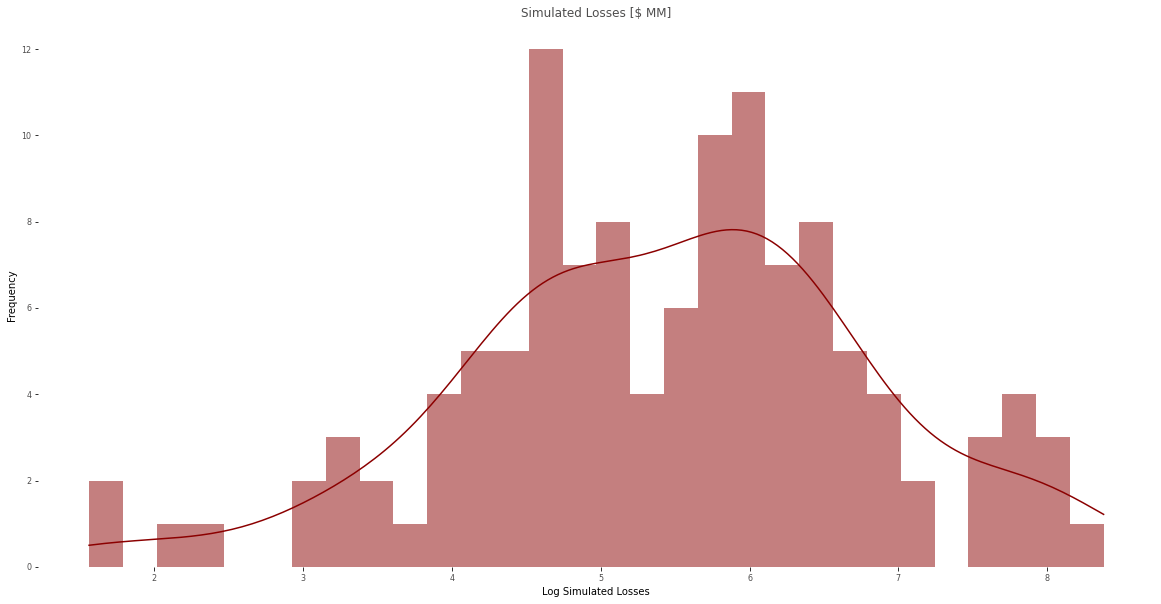

In [20]:
# Updated histogram using sns.histplot
plt.figure(figsize=(20, 10))
sns.histplot(actual_losses, bins=30, color='darkred', kde=True, edgecolor="none")  
plt.xlabel('Log Simulated Losses')
plt.ylabel('Frequency')
plt.title('Simulated Losses [$ MM]', size=12, color='#4f4e4e')
plt.xticks(size=8, color='#4f4e4e')
plt.yticks(size=8, color='#4f4e4e')
sns.despine(left=True, bottom=True)
plt.show()